# Pytorch basics

<center><a href="https://pytorch.org/">
    <img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width="300"></a></center>
    
In this first script, we see the basics of Pytorch for manipulating tensors.

Remember to check the [official documentation](https://pytorch.org/docs/stable/index.html), which is frequently used in these labs.

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

## Creating tensors

A [tensor](https://en.wikipedia.org/wiki/Tensor) is a multi-dimensional array (just like numpy arrays), which can store any structured numerical data. A 0D-tensor is just a scalar number, a 1D-tensor is a vector, a 2D-tensor is a matrix, a 3D-tensor is a "cube", etc.

<center><a href="https://medium.com/@anoorasfatima/10-most-common-maths-operation-with-pytorchs-tensor-70a491d8cafd">
    <img src="https://miro.medium.com/max/1308/1*8jdzMrA33Leu3j3F6A8a3w.png" width="400"></a></center>

In [2]:
# Reminder of numpy
x = np.zeros((1, 5)) # create a 2D array (of shape 1x5) filled with 0
print(x)
x = np.ones((1, 5)) # create a 2D array (of shape 1x5) filled with 1
print(x)
x = np.array([[1, 2], [3, 4]]) # create an array with specified values
print(x)
print(x.shape, x.shape[0], x.shape[1]) # get the shape of an array
x = np.random.randn(4, 5) # create an array with numbers drawn from a standard normal distribution
print(x)

[[0. 0. 0. 0. 0.]]
[[1. 1. 1. 1. 1.]]
[[1 2]
 [3 4]]
(2, 2) 2 2
[[-0.14268817  1.2226934   0.58972717 -0.51069441 -0.76515981]
 [ 0.24983188  0.96871074  1.33684103  0.24490112 -1.29635647]
 [ 1.04140981 -0.15943321  0.16138311  0.6304684  -1.37932342]
 [ 0.8123987   0.43957352 -0.70298629 -1.43297474 -0.72781331]]


In [6]:
# TO DO: create the same tensors in pytorch
# hint: use 'torch' instead of 'np', the functions are similar
torch.zeros(1, 5)
torch.ones(1, 5)
torch.tensor([[1, 2], [3, 4]])
torch.randn(4, 5)

tensor([[ 1.8841, -0.0642,  0.0585, -0.4415, -0.1292],
        [ 1.2763,  0.4228, -0.2234,  1.3160, -0.0472],
        [ 0.3869,  0.9287,  1.1409,  0.7361, -0.3596],
        [-0.4451,  1.3596, -0.0144, -0.5121,  0.2681]])

In [7]:
# Numpy Bridge: it's also possible to directly transform numpy arrays into pytorch tensor
x_np = np.ones((2,3))
print(x_np)
x_pt = torch.from_numpy(x_np)
print(x_pt)

# And conversely:
x_np = x_pt.numpy()
print(x_np)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
[[1. 1. 1.]
 [1. 1. 1.]]


In [8]:
# Another way to create a tensor filled with a given value
x = torch.zeros((1, 5))
x.fill_(20)
print(x)

tensor([[20., 20., 20., 20., 20.]])


In [9]:
# With some functions, you can create an array without explicitly providing the shape (but instead use another tensor)
y = torch.randn_like(x)
print(y)
print(y.shape, x.shape)

tensor([[-1.3180,  0.9238,  0.3946,  0.2721, -0.1242]])
torch.Size([1, 5]) torch.Size([1, 5])


In [11]:
# TO DO:
# - create a tensor x0 that has the same size of x and filled with 0
# - create a tensor x1 that has the same size of x and filled with 1
x0 = torch.zeros_like(x)
x1 = torch.zeros_like(x).fill_(1)
print(x1)

tensor([[1., 1., 1., 1., 1.]])


In [12]:
# Create an array of numbers from 'ind_beg' to 'ind_end' with an increment of 'inc_step'
ind_beg = 3
ind_end = 10
inc_step = 2
x = torch.arange(ind_beg, ind_end, inc_step)
print(x)

# Default values are 'ind_beg=0' and 'inc_step=1': 
x = torch.arange(ind_end)
print(x)

tensor([3, 5, 7, 9])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


## Basic loops

In [13]:
# The most simple 'for' loop
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [15]:
# alternatively, you can create a tensor containing the indices over which iterating
list_iter = torch.arange(10)
for i in list_iter:
    print(i.item())

0
1
2
3
4
5
6
7
8
9


In [16]:
# You can also directly iterate over the elements of a 1D-tensor (or list) 
my_list = torch.randn(10)
print(my_list)
for x in my_list:
    print(x)

tensor([-1.0538,  0.0849, -0.5657, -0.2698, -0.0627, -0.4021,  0.8938,  1.0574,
        -0.1708, -1.3056])
tensor(-1.0538)
tensor(0.0849)
tensor(-0.5657)
tensor(-0.2698)
tensor(-0.0627)
tensor(-0.4021)
tensor(0.8938)
tensor(1.0574)
tensor(-0.1708)
tensor(-1.3056)


In [17]:
# If you use 'enumerate', you can keep track of the index
for i, x in enumerate(my_list):
    print(i, x)

0 tensor(-1.0538)
1 tensor(0.0849)
2 tensor(-0.5657)
3 tensor(-0.2698)
4 tensor(-0.0627)
5 tensor(-0.4021)
6 tensor(0.8938)
7 tensor(1.0574)
8 tensor(-0.1708)
9 tensor(-1.3056)


In [ ]:
# If the object to iterate is a multivariate tensor (2D, 3D, etc.), then it will iterate over the first dimension
# For instance, if we iterate over a tensor of size [10, 16, 16], it will produce 10 tensors of size [16,16]
mytensor = torch.randn(10, 16, 16)
for x in mytensor:
    print(x.shape)
    plt.figure()
    plt.imshow(x)
    plt.show()

## Basic operations

In [19]:
x = torch.ones((1,5))
x.fill_(5)
y = torch.ones((1,5))
y.fill_(3)

# Addition, subtraction, multiplication, division, and power
print(x+y)
print(x-y)
print(x*y)
print(x/y)
print(x ** y)

tensor([[8., 8., 8., 8., 8.]])
tensor([[2., 2., 2., 2., 2.]])
tensor([[15., 15., 15., 15., 15.]])
tensor([[1.6667, 1.6667, 1.6667, 1.6667, 1.6667]])
tensor([[125., 125., 125., 125., 125.]])


In [20]:
# Pytorch has some built-in basic math functions (exp, sin, cos...) that can be applied element-wise to a tensor
x = torch.randn(2,3)
y = torch.exp(x)
print(y)

tensor([[1.6434, 4.3453, 0.1715],
        [0.1693, 0.6178, 1.8370]])


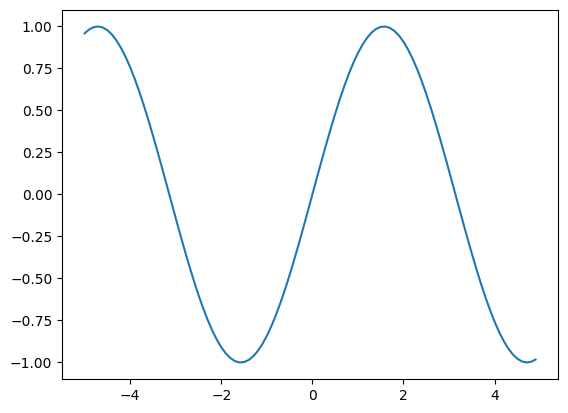

In [21]:
# TO DO: plot the function y=sin(x)
# - create a tensor x which ranges from -5 to 5 with a step increment of 0.1
# - compute y=sin(x) (use the torch.sin function)
# - plot it using plt.plot(x, y)
x = torch.arange(-5, 5, 0.1)
y = torch.sin(x)
plt.plot(x, y);

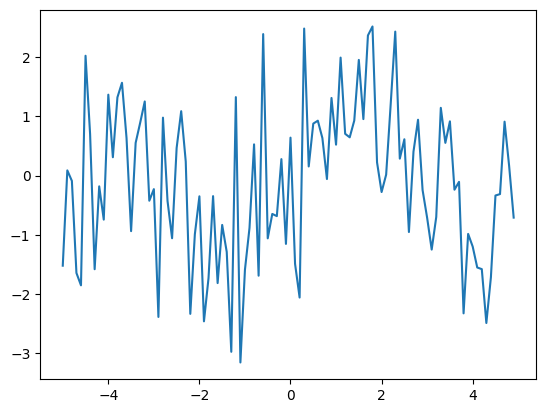

In [23]:
# TO DO: plot a noisy sinusoid
# - create a noise tensor called 'noise' with the same shape as y (use torch.randn_like)
# - compute z, which is the sum of y and the noise tensor (you can adjust the amount of noise if you want)
# - plot z as a function of x
noise = torch.randn_like(x)
z = y + noise
plt.plot(x, z);

In [26]:
# Slicing (same as in numpy)
x = torch.randn(5,6)
print(x[:3])  # slice over the first dimension
print(x[:, :3]) # slice over the second dimension
print(x[:3,:3]) # slice over both dimensions

tensor([[ 1.1902, -0.4222,  0.7287, -0.7200, -0.0347, -0.8422],
        [ 1.0803, -0.7100, -0.3826,  0.1735, -1.1263,  1.1826],
        [-0.2342,  0.8084,  0.0244, -0.3880, -0.3094, -0.7305]])
tensor([[ 1.1902, -0.4222,  0.7287],
        [ 1.0803, -0.7100, -0.3826],
        [-0.2342,  0.8084,  0.0244],
        [-0.9191,  0.7420,  0.6794],
        [-0.3465,  1.4241,  1.6500]])
tensor([[ 1.1902, -0.4222,  0.7287],
        [ 1.0803, -0.7100, -0.3826],
        [-0.2342,  0.8084,  0.0244]])


In [25]:
# Useful functions are min, max, argmin and argmax
x = torch.rand(1, 5)
print(x)
print(x.min(), x.max(), x.argmin(), x.argmax())

# It's also easy to sort a tensor with ascending values
x_sorted, ind_sort = x.sort()
print(x_sorted, ind_sort)

tensor([[0.5385, 0.9401, 0.2695, 0.8576, 0.7621]])
tensor(0.2695) tensor(0.9401) tensor(2) tensor(1)
tensor([[0.2695, 0.5385, 0.7621, 0.8576, 0.9401]]) tensor([[2, 0, 4, 3, 1]])


tensor(2.5000)


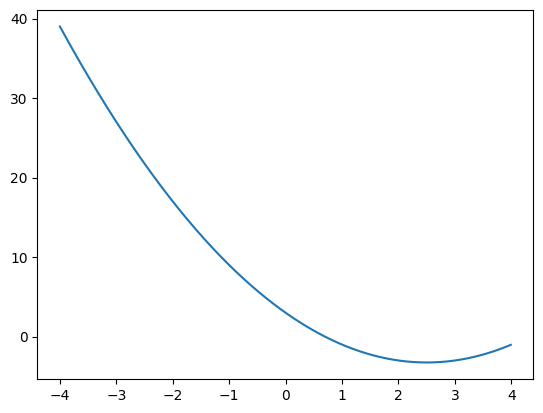

In [27]:
# TO DO: find the minimum of a quadratic function
# - create a tensor x which ranges from -4 to 4 with a step of 0.01
# - compute y = x^2 - 5x + 3
# - plot y as a function of x
# - compute the minimum value of y and print it
# - find the index 'ind_min' corresponding to this minimum (hint: use the argmin function)
# - compute the value of x corresponding to the minimum.
x = torch.arange(-4, 4, 0.01)
y = x**2 -5*x + 3
plt.plot(x, y);
ind_min = y.argmin()
print(x[ind_min])

## Tensor types

In Pytorch there are several data types, which are listed in the [documentation](https://pytorch.org/docs/stable/tensors.html).

In [28]:
x = torch.rand(1, 10)
print(x)

# Display the type using the 'dtype' attribute
# By default, it should be float32
print(x.dtype)

tensor([[0.9901, 0.0356, 0.2678, 0.3284, 0.0534, 0.1041, 0.5402, 0.4470, 0.7635,
         0.1644]])
torch.float32


In [29]:
# Change the type using the 'type' method
x = x.type(torch.float16)
print(x.dtype)

# Convert it to integer
x = x.type(torch.int16)
print(x.dtype)
print(x)

torch.float16
torch.int16
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int16)


In [30]:
# You can specify the type when creating a tensor
x = torch.tensor(3, dtype=torch.int)
print(x)

tensor(3, dtype=torch.int32)


In [31]:
# Check if it's a float
x = torch.tensor(3, dtype=torch.int)
print(x.is_floating_point())

pi = torch.tensor(3.14159)
print(pi, pi.is_floating_point(), pi.dtype)

False
tensor(3.1416) True torch.float32


## Reshaping

In [32]:
x = torch.randn(8,5)
print(x.shape)

# Transposition: use either 'x.t()' or 'x.transpose(dims)' where 'dims' specifies the new dimensions order
y = x.transpose(1,0)
print(y.shape)

z = x.t()
print(z.shape)

torch.Size([8, 5])
torch.Size([5, 8])
torch.Size([5, 8])


In [ ]:
# Reshape: reorganize the tensor with the specified output dimensions (similar as 'numpy.reshape')
x = torch.randn(8,5)
y = x.reshape(10,4)
print(x.shape, y.shape)

# You can only specify one dimension and mark the other with '-1', and it will autocomplete consistently
z = x.reshape(-1, 10)
print(z.shape)
z = x.reshape(2, -1)
print(z.shape)


In [33]:
# View: similar as 'reshape', but only creates a view over the tensor: if the original data is changed, then the viewed tensors also changes
x = torch.zeros(8,5)
y = x.view(10,4)
print(y)

x.fill_(1)
print(y)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


## Assembling tensors

In [34]:
# Concatenate: useful to concatenate tensors along a specified (existing) dimension
# Works with any tensors, provided that the dimensions over which you don't concatenate are consistent
x1 = torch.rand(15, 64, 64)
x2 = torch.rand(50, 64, 64)
X_concat = torch.cat((x1,x2), dim=0)
print(X_concat.shape)

x1 = torch.rand(10, 217)
x2 = torch.rand(10, 489)
X_concat = torch.cat((x1,x2), dim=1)
print(X_concat.shape)

x1 = torch.rand(10, 217, 12)
x2 = torch.rand(10, 217, 14)
X_concat = torch.cat((x1,x2), dim=2)
print(X_concat.shape)

torch.Size([65, 64, 64])
torch.Size([10, 706])
torch.Size([10, 217, 26])


In [37]:
# If a tensor a dimension over which the size is '1', you can get ridd of it (if needed) by squeezing the tensor
x = torch.zeros(2, 1, 5)
print(x.shape)
y = x.squeeze()
print(y.shape)

torch.Size([2, 1, 5])
torch.Size([2, 5])


In [38]:
# Conversely, if you want to expand a tensor by adding a new dimension, you can unsqueeze it (useful for concatenating tensors)
x = torch.zeros(2, 5)
print(x.shape)
y = x.unsqueeze(1)
print(y.shape)

torch.Size([2, 5])
torch.Size([2, 1, 5])


In [40]:
# TO DO :
# - create two tensors of shape 16x16 with random values.
# - concatenate them into a single tensor of size (2, 16, 16)
# hint: first 'unsqueeze' the tensors to create a new dimension, and then 'cat' over this dimension
x = torch.randn(16, 16)
y = torch.randn(16, 16)
z = torch.cat((x.unsqueeze(0),y.unsqueeze(0)),dim=0)
print(z.shape)

torch.Size([2, 16, 16])


In [42]:
# Stack: unlike 'cat', 'stack' concatenates the tensors along a new dimension (the inputs tensors must have the same shape)
x = torch.ones(3, 10)
y = torch.ones(3, 10)
print(x.shape, y.shape)

z_stack = torch.stack((x, y), dim=0)
print(z_stack.shape)

# Check the difference with 'cat'
z_cat = torch.cat((x, y), dim=0)
print(z_cat.shape)

torch.Size([3, 10]) torch.Size([3, 10])
torch.Size([2, 3, 10])
torch.Size([6, 10])


In [43]:
# It's possible to stack over any dimension, so it will create a tensor accordingly
z_stack = torch.stack((x, y), dim=1)
print(z_stack.shape)

z_stack = torch.stack((x, y), dim=2)
print(z_stack.shape)

torch.Size([3, 2, 10])
torch.Size([3, 10, 2])


In [44]:
# TO DO : same exercice as before but using stack (should be simpler)
x = torch.randn(16, 16)
y = torch.randn(16, 16)
z = torch.stack((x,y),dim=0)
print(z.shape)

torch.Size([2, 16, 16])


## Save and load files

In [ ]:
# Reminder in numpy
x_np = np.ones((2,3))
np_filepath = 'x_np.npy'
np.save(np_filepath, x_np)
x_np_load = np.load(np_filepath)
print(x_np_load)

# In pytorch, it's very similar
x_tensor = torch.from_numpy(x_np)
tensor_filepath = 'x_tensor.pt'
torch.save(x_tensor, tensor_filepath)
x_tensor_load = torch.load(tensor_filepath)
print(x_tensor_load)

## Devices

Finally, let's note that there are two types of *devices* in Pytorch: `cpu` and `cuda`. By default, every tensor's device is `cpu`, which means that all computation are performed on the CPU. However, when training big models and handling big datasets (which is common in deep learning), it's more convenient to use a graphic card (GPU) for the computation. To do that, we just need to tell Pytorch that the data / tensors / models should be copied on a `cuda` device.
This is mostly for your general knowledge: we won't use GPU computation in these labs.

**Note**: If you didn't install pytorch with CUDA, you should get an error if you try to copy a tensor to `cuda`. That's fine.

In [45]:
# You can check if a GPU is available (and how many)
print('Cuda available:', torch.cuda.is_available())
print('Number of GPUs:', torch.cuda.device_count())

# By default, any tensor will be on a 'cpu' device
x = torch.rand(1, 10)
print(x.device)

# You can change it using the 'to' method 
# Doing this is only possible if you have installed CUDA with Pytorch, so you might get an error here.
x = x.to('cuda')
print(x.device)

Cuda available: False
Number of GPUs: 0
cpu


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx